In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [3]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

# bdd 1

In [4]:
bdd = pd.read_csv("/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/summary/bdd_cingulate_flanker_2023-08-24_shuffled.csv", index_col=0)
bdd = bdd.sort_values(by=['best_test_auc'], ascending=False)
bdd.head()

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,lr,train_loss
41,/volatile2/jc225751/Runs/61_classifier_regress...,0.602704,0.453714,0.492275,0.496884,0.539565,0.591292,0.176382,0.000395,138.294159
108,/volatile2/jc225751/Runs/61_classifier_regress...,0.894607,0.456901,0.417416,0.678655,0.429601,0.577949,0.059688,0.000192,137.179428
2,/volatile2/jc225751/Runs/61_classifier_regress...,0.544005,0.506236,0.550632,0.486696,0.567697,0.567697,0.085163,0.006009,138.584305
78,/volatile2/jc225751/Runs/61_classifier_regress...,0.855272,0.452882,0.413483,0.592145,0.580100,0.563904,0.144469,0.000252,135.656097
103,/volatile2/jc225751/Runs/61_classifier_regress...,0.492110,0.582802,0.539537,0.489862,0.619873,0.559480,0.284296,0.001473,138.569382


/home/jc225751/Runs/61_classifier_regresser/Program/venv_natif/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jc225751/Runs/61_classifier_regresser/Program/venv_natif/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


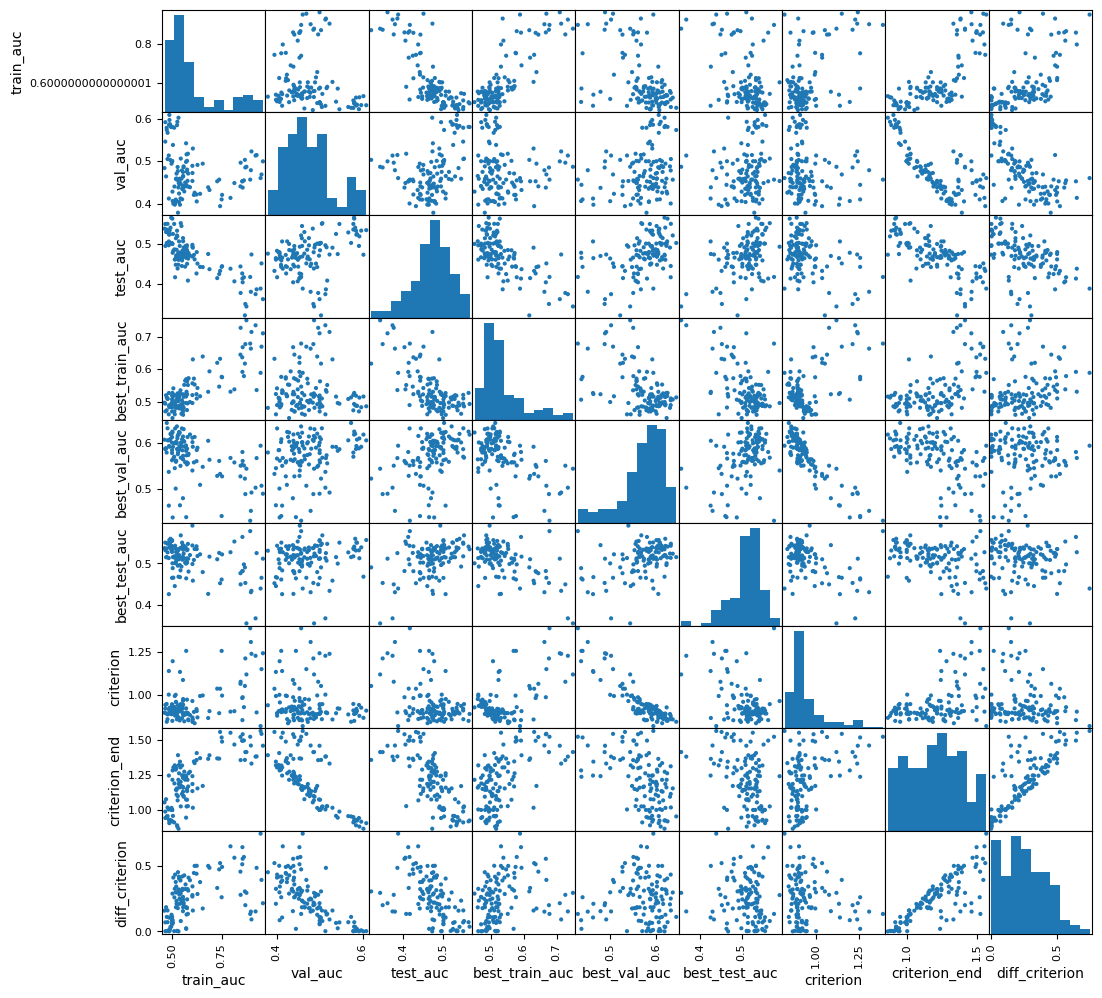

In [5]:
bdd["criterion"] = abs(bdd["best_val_auc"] - bdd["best_train_auc"]) + 2*(1-bdd["best_val_auc"])
bdd["criterion_end"] = abs(bdd["val_auc"] - bdd["train_auc"]) + 2*(1-bdd["val_auc"])
bdd["diff_criterion"] = abs(bdd["criterion"]-bdd["criterion_end"])
bdd["diff_best"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"]))
bdd["diff_end"] = np.log(abs(bdd["val_auc"] - bdd["train_auc"])+0.01)
bdd["criterion2"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"])) + np.log(0.7-bdd["best_val_auc"])
bdd["diff"] = np.log(abs(bdd["best_train_auc"] - 0.55))
obj = pd.plotting.scatter_matrix(bdd[['train_auc', 'val_auc', 'test_auc', 'best_train_auc', 'best_val_auc', 'best_test_auc', 'criterion', 'criterion_end', 'diff_criterion']],
                                 figsize=(12,12),
                                 alpha=1.0)

Text(0, 0.5, 'best_test_auc')

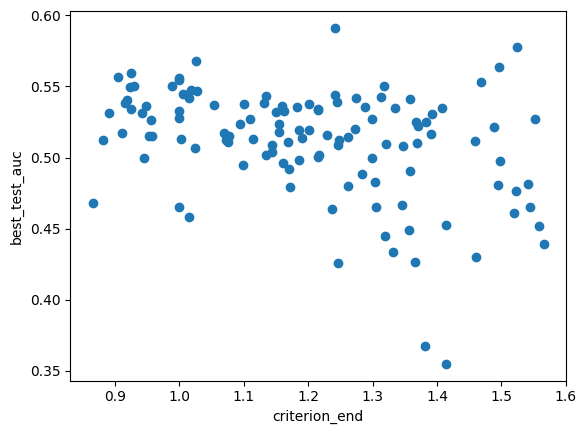

In [6]:
plt.scatter(bdd["criterion_end"], bdd.best_test_auc)
plt.xlabel("criterion_end")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

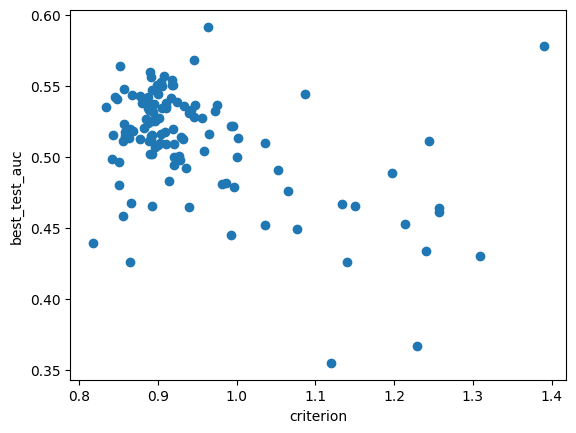

In [17]:
plt.scatter(bdd["criterion"], bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

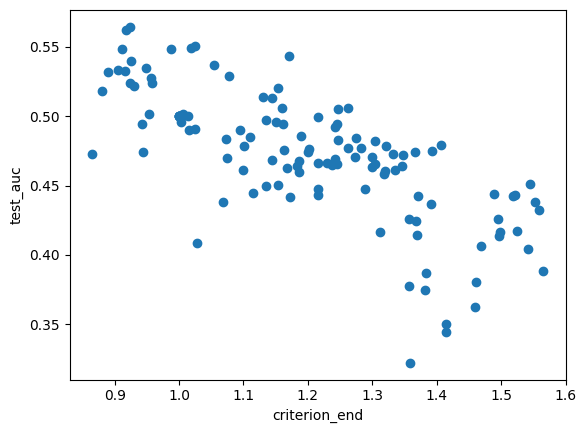

In [8]:
plt.scatter(bdd["criterion_end"], bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

In [15]:
quantile = []
test_auc = []
quantile_x = np.arange(0.05,1,0.05)
for q in quantile_x:
    one_quantile = bdd['criterion_end'].quantile(q=q)
    quantile.append(one_quantile)
    test_auc.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].mean())

Text(0, 0.5, 'test_auc')

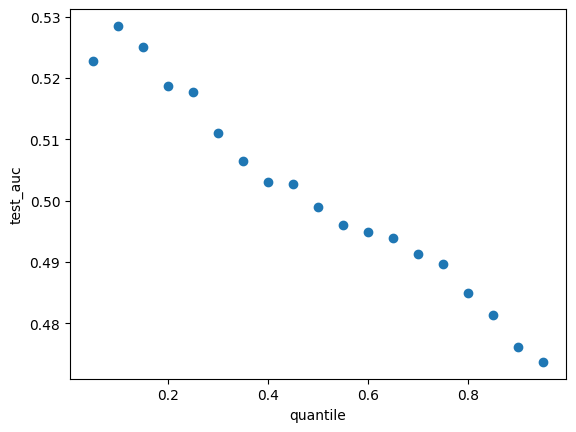

In [16]:
plt.scatter(quantile_x, test_auc)
plt.xlabel("quantile")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

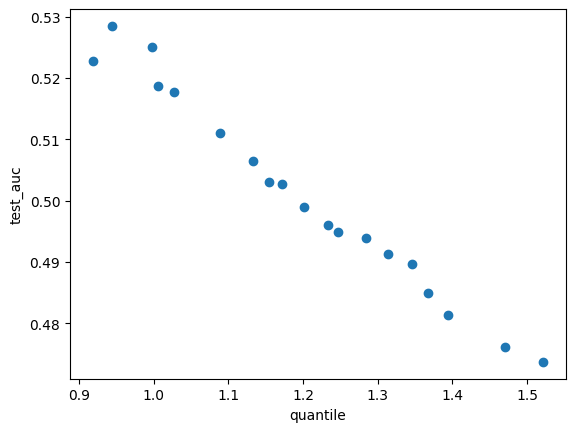

In [18]:
plt.scatter(quantile, test_auc)
plt.xlabel("quantile")
plt.ylabel("test_auc")

(0.75, 1.08)

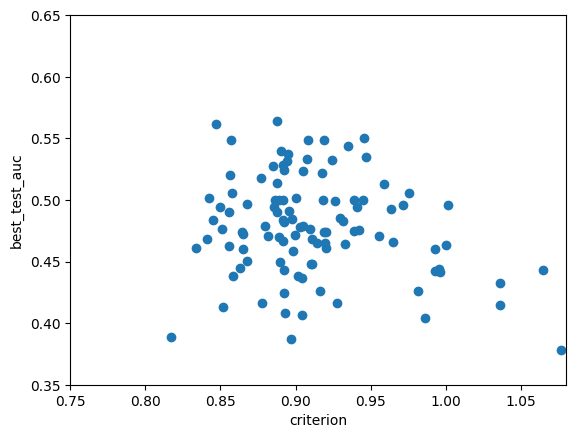

In [9]:
plt.scatter(bdd.criterion, bdd.test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")
plt.ylim((0.35,0.65))
plt.xlim((0.75,1.08))

(0.4, 0.65)

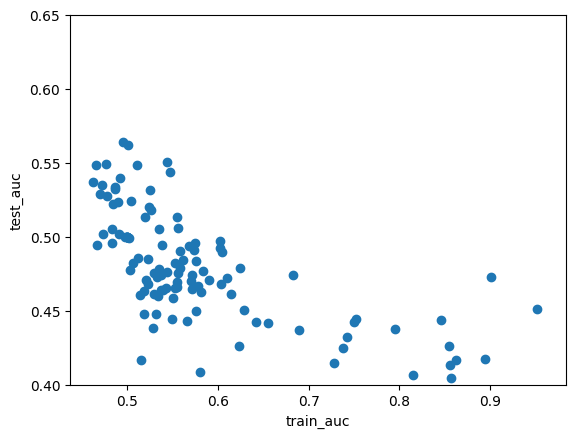

In [10]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")
plt.ylim((0.4,0.65))

Text(0, 0.5, 'criterion')

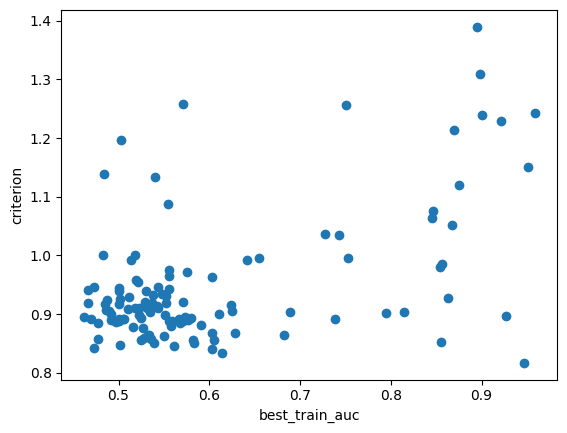

In [11]:
plt.scatter(bdd.train_auc, bdd.criterion)
plt.xlabel("best_train_auc")
plt.ylabel("criterion")

(0.4, 0.6)

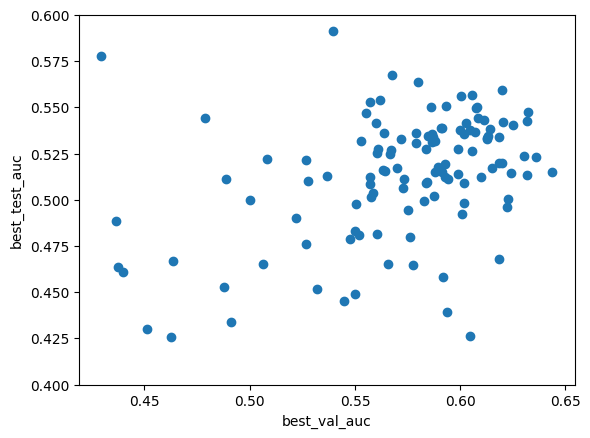

In [12]:
plt.scatter(bdd.best_val_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.6))

(0.4, 0.6)

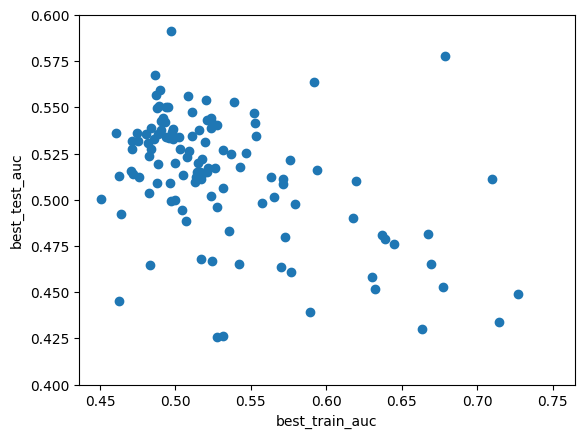

In [13]:
plt.scatter(bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.6))

In [14]:
wanted_datasets = ['cingulate_UkBioBank_least_folded_551', 'cingulate_UkBioBank_mid_folded_551', 'cingulate_UkBioBank_most_folded_551',
                   'cingulate_UkBioBank_full']
filtered_bdd = bdd[(bdd.dataset_name.isin(wanted_datasets)) & (bdd.max_epochs == 251)]
filtered_bdd['deterministic_dataset'] = filtered_bdd.random_state.isna()
filtered_bdd

AttributeError: 'DataFrame' object has no attribute 'dataset_name'

In [ ]:
filtered_bdd.groupby(['dataset_name', 'deterministic_dataset']).auc.count()

dataset_name                          deterministic_dataset
cingulate_UkBioBank_full              False                    10
                                      True                     10
cingulate_UkBioBank_least_folded_551  True                      5
cingulate_UkBioBank_mid_folded_551    True                      8
cingulate_UkBioBank_most_folded_551   True                      5
Name: auc, dtype: int64

[]

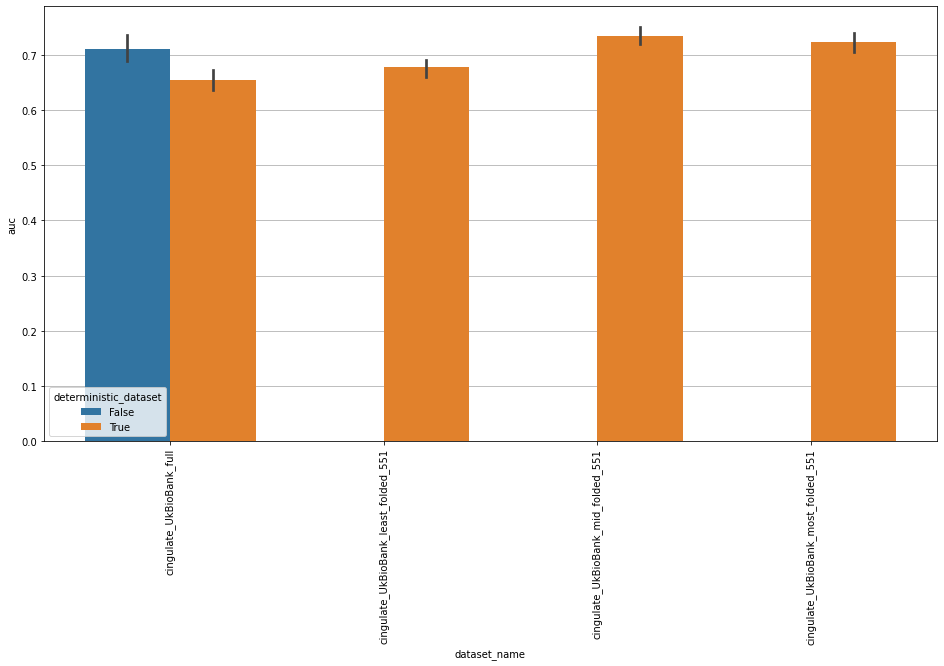

In [ ]:
plt.figure(figsize=(16,8))
plt.gca().set_axisbelow(True)
plt.grid(axis='y')

sns.barplot(data=filtered_bdd, x='dataset_name', y='auc', hue='deterministic_dataset', ci=95)
plt.xticks(rotation=90)
plt.plot()

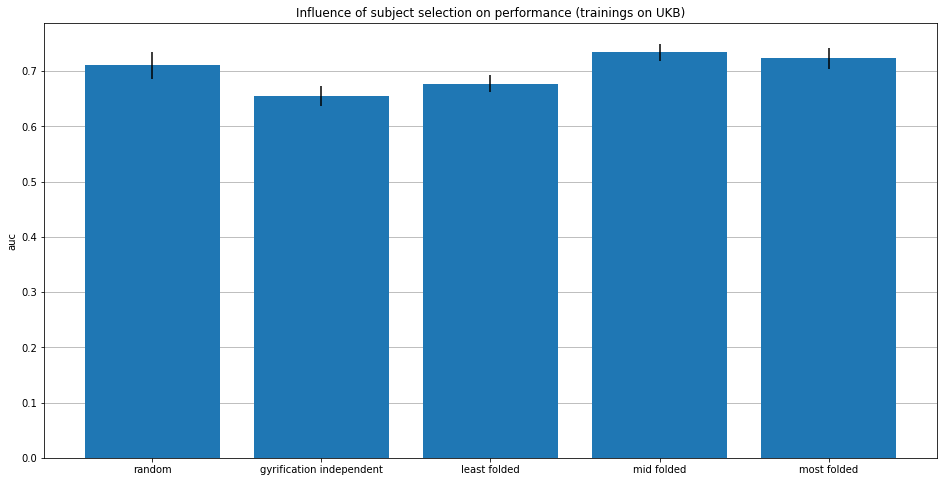

In [ ]:
Y = filtered_bdd.groupby(['dataset_name', 'deterministic_dataset']).auc.mean()

err_bars = filtered_bdd.groupby(['dataset_name', 'deterministic_dataset']).auc.apply(confidence_interval)


plt.figure(figsize=(16,8))
plt.gca().set_axisbelow(True)
plt.grid(axis='y')

plt.bar(range(len(Y)), Y)
plt.errorbar(range(len(Y)), Y.values, err_bars, fmt='none', c='black')

labels = ['random', 'gyrification independent', 'least folded', 'mid folded', 'most folded']
plt.xticks(ticks=range(len(Y)), labels=labels, rotation=0)
plt.ylabel('auc')
plt.title("Influence of subject selection on performance (trainings on UKB)")
plt.show()

Text(0, 0.5, 'auc')

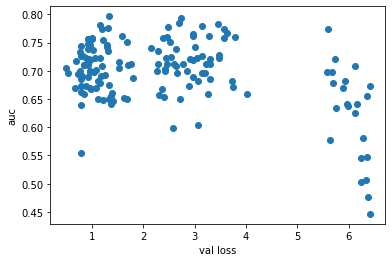

In [ ]:
plt.scatter(bdd.val_loss, bdd.auc)
plt.xlabel("val loss")
plt.ylabel("auc")

In [ ]:
bdd[(bdd.max_epochs == 251) & (bdd.dataset_name == 'cingulate_UkBioBank_most_folded_551')].auc.mean()

0.7234621750069892

In [ ]:
bdd[bdd.foldlabel == False]

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,dataset_name,foldlabel,max_angle,max_epochs,nb_subjects,num_representation_features,train_val_csv_file,git_branch
79,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.734549,0.003508,0.716257,0.005491,convnet,cingulate_HCP_half_1,False,6,5,-1,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,Run_03_aymeric
80,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.712555,0.003185,0.686456,0.012417,convnet,cingulate_HCP_half_1,False,6,5,-1,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,Run_03_aymeric
81,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.687001,0.003267,0.666292,0.006949,convnet,cingulate_HCP_half_1,False,6,5,-1,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,Run_03_aymeric
82,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.716335,0.002193,0.702760,0.008781,convnet,cingulate_HCP_half_1,False,6,5,-1,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,Run_03_aymeric
0,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.554332,0.020763,0.607836,0.019011,pointnet,cingulate_HCP_half_1,False,10,251,-1,30,NaN,pointnet
78,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.651144,0.003759,0.661053,0.015104,convnet,cingulate_UkBioBank_most_folded_551,False,6,5,-1,10,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,Run_03_aymeric


In [ ]:
def plot_func_of_epochs(df):
    means = df.groupby('max_epochs').mean().auc
    n = means.shape[0]

    counts = df.groupby('max_epochs').count().auc
    print(counts)

    yerrs = []
    for n_epochs in df.max_epochs.unique():
        filtered_df = df[df.max_epochs == n_epochs]
        yerrs.append(confidence_interval(filtered_df.auc))

    fig, ax = plt.subplots()

    plt.grid(axis='y')
    ax.set_axisbelow(True)
    plt.bar(range(n), means)
    plt.xticks(range(n), df.max_epochs.unique())
    plt.errorbar(range(n), means, yerr=yerrs, xerr=None, ecolor='black', fmt='None')
    plt.plot()

    return means

max_epochs
1       7
5      22
25      7
125     5
251     5
Name: auc, dtype: int64


max_epochs
1      0.643889
5      0.711136
25     0.679192
125    0.670194
251    0.677408
Name: auc, dtype: float64

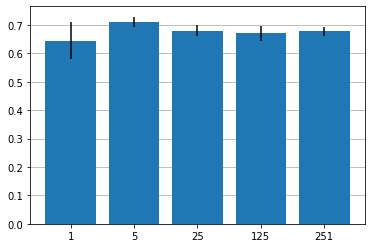

In [ ]:
# least folded brains
least_folded = bdd[bdd.dataset_name == 'cingulate_UkBioBank_least_folded_551']

plot_func_of_epochs(least_folded)

max_epochs
1      11
5      11
25      7
125     5
251     5
Name: auc, dtype: int64


max_epochs
1      0.618493
5      0.739359
25     0.730130
125    0.743861
251    0.723462
Name: auc, dtype: float64

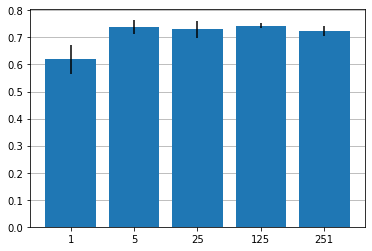

In [ ]:
# most folded brains
most_folded = bdd[bdd.dataset_name == 'cingulate_UkBioBank_most_folded_551']

plot_func_of_epochs(most_folded)

max_epochs
1       5
5      13
25      6
125     5
251     8
Name: auc, dtype: int64


max_epochs
1      0.601672
5      0.714030
25     0.687363
125    0.714806
251    0.734495
Name: auc, dtype: float64

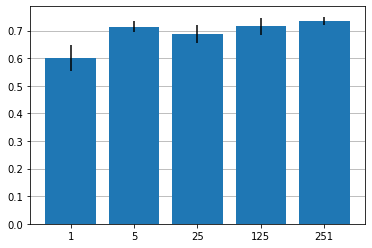

In [ ]:
# mid folded brains
mid_folded = bdd[bdd.dataset_name == 'cingulate_UkBioBank_mid_folded_551']

plot_func_of_epochs(mid_folded)

## Analysis

In [ ]:
from scipy.stats import ttest_ind

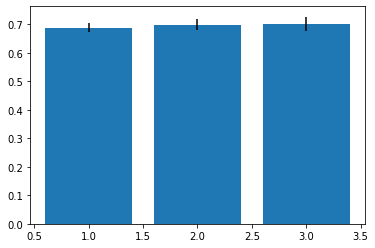

Least and mid Ttest_indResult(statistic=-0.9103125616204584, pvalue=0.3655486344742803)
Least and most Ttest_indResult(statistic=-0.9583393749858953, pvalue=0.34140135534303395)
Mid and most Ttest_indResult(statistic=0.19875362706087826, pvalue=0.8430386951543052)


In [ ]:
datasets = [least_folded, mid_folded, most_folded]

def plot_bars_with_errors(datasets, title=None):
    means = [datasets[i].auc.mean() for i in range(len(datasets))]
    X = range(1,4)

    plt.bar(X, means)

    errorbars = []

    for dataset in datasets:
        data = dataset.auc
        diff = confidence_interval(data)
        errorbars.append(diff)

    plt.errorbar(X, means, yerr=errorbars, xerr=None, ecolor='black', fmt='None')

    plt.title(title)
    plt.show()


plot_bars_with_errors(datasets)

print('Least and mid', ttest_ind(least_folded.auc, mid_folded.auc, equal_var=False))
print('Least and most', ttest_ind(least_folded.auc, most_folded.auc, equal_var=False))
print('Mid and most', ttest_ind(most_folded.auc, mid_folded.auc, equal_var=False))

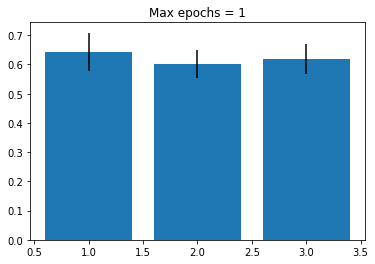

Least and mid Ttest_indResult(statistic=0.9452763816251348, pvalue=0.36693850314770804)
Least and most Ttest_indResult(statistic=0.5589464462368582, pvalue=0.5858576382900519)
Mid and most Ttest_indResult(statistic=0.43316764139327457, pvalue=0.6726569936847302)


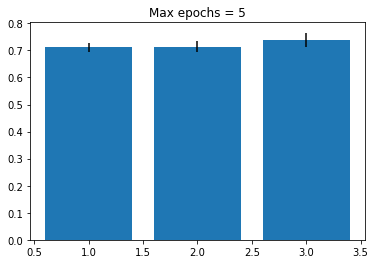

Least and mid Ttest_indResult(statistic=-0.20523196704172206, pvalue=0.8389060675118276)
Least and most Ttest_indResult(statistic=-1.68844654309995, pvalue=0.10791718692855129)
Mid and most Ttest_indResult(statistic=1.4354843123524859, pvalue=0.16692733020059095)


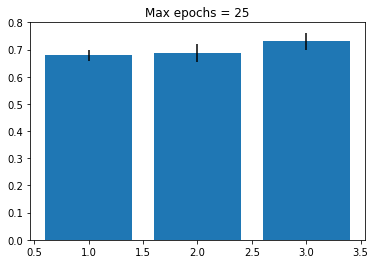

Least and mid Ttest_indResult(statistic=-0.394162569592167, pvalue=0.7031530274862974)
Least and most Ttest_indResult(statistic=-2.469791624882359, pvalue=0.033030243225199284)
Mid and most Ttest_indResult(statistic=1.7208449095741163, pvalue=0.11351433562715971)


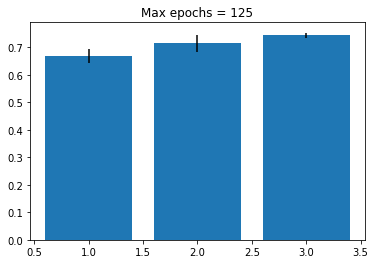

Least and mid Ttest_indResult(statistic=-1.9141338887371169, pvalue=0.0935240276136069)
Least and most Ttest_indResult(statistic=-4.70480358147686, pvalue=0.005062893758803562)
Mid and most Ttest_indResult(statistic=1.5354012555644083, pvalue=0.18860451781605211)


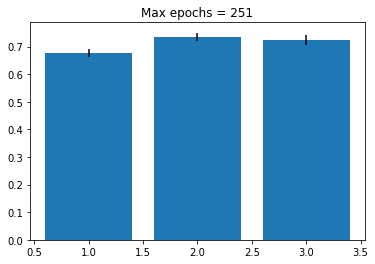

Least and mid Ttest_indResult(statistic=-4.7450991056461165, pvalue=0.0007679265811553201)
Least and most Ttest_indResult(statistic=-3.3536939839749467, pvalue=0.010733294682982722)
Mid and most Ttest_indResult(statistic=-0.8087178453577418, pvalue=0.4404761678118645)


In [ ]:
n_epochs = [1,5,25,125,251]

for n in n_epochs:
    dbs = []
    for db in [least_folded, mid_folded, most_folded]:
        db = db[db.max_epochs == n]
        dbs.append(db)
        
    plot_bars_with_errors(dbs, title=f'Max epochs = {n}')
    print('Least and mid', ttest_ind(dbs[0].auc, dbs[1].auc, equal_var=False))
    print('Least and most', ttest_ind(dbs[0].auc, dbs[2].auc, equal_var=False))
    print('Mid and most', ttest_ind(dbs[2].auc, dbs[1].auc, equal_var=False))

# bdd 2

In [ ]:
bdd2 = pd.read_csv("/neurospin/dico/agaudin/Runs/05_rigourous/Output/gyrification/bdd_gyrification.csv", index_col=0)
bdd2.seed = bdd2.seed.fillna('None')
bdd2.random_state = bdd2.random_state.fillna('None')
bdd2 = bdd2.sort_values(by=['dataset_name', 'seed'], ascending=True)
bdd2

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,nb_subjects,seed,train_val_csv_file,train_loss,val_loss,random_state
25,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.686054,0.005992,0.662316,0.007666,cingulate_UkBioBank_full,551,-1,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.543002,0.645532,None
26,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.653289,0.008141,0.629497,0.011017,cingulate_UkBioBank_full,551,-1,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.526436,0.892597,None
27,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.579196,0.016757,0.615485,0.014779,cingulate_UkBioBank_full,551,-1,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.630404,0.945455,None
28,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.661115,0.004417,0.689661,0.011447,cingulate_UkBioBank_full,551,-1,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.539450,0.511343,None
29,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.736467,0.003258,0.722199,0.009228,cingulate_UkBioBank_full,551,-1,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.799915,1.122584,None
...,...,...,...,...,...,...,...,...,...,...,...,...
5,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.781990,0.002745,0.712585,0.006795,cingulate_UkBioBank_most_folded_551,-1,1,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.901927,1.423130,None
6,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.645431,0.007441,0.640281,0.010962,cingulate_UkBioBank_most_folded_551,-1,1,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.661693,0.772966,None
7,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.698808,0.003932,0.626784,0.006968,cingulate_UkBioBank_most_folded_551,-1,1,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.608464,0.808280,None
8,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.649941,0.004769,0.646152,0.010594,cingulate_UkBioBank_most_folded_551,-1,1,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.584766,0.735708,None


In [ ]:
bdd2.groupby(['dataset_name','seed']).auc.mean()

dataset_name                          seed
cingulate_UkBioBank_full              -1.0    0.669356
                                      1.0     0.710370
                                      None    0.682610
cingulate_UkBioBank_least_folded_551  -1.0    0.684923
                                      1.0     0.690923
cingulate_UkBioBank_mid_folded_551    1.0     0.728604
cingulate_UkBioBank_most_folded_551   1.0     0.705804
Name: auc, dtype: float64

In [ ]:
filtered_bdd.seed.unique()

array([1.0, 'None'], dtype=object)

[]

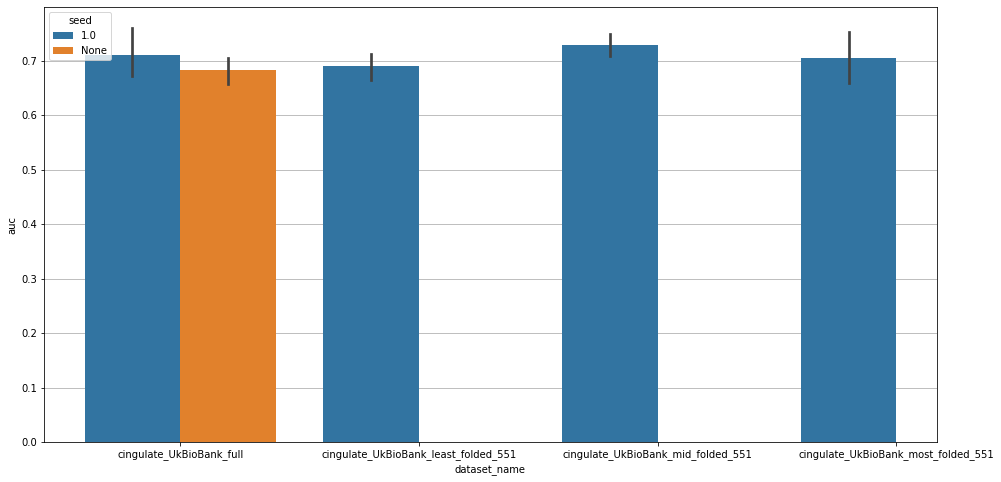

In [ ]:
filtered_bdd = bdd2[bdd2.seed != -1]

plt.figure(figsize=(16,8))
plt.gca().set_axisbelow(True)
plt.grid(axis='y')

sns.barplot(data=filtered_bdd, x='dataset_name', y='auc', hue='seed', ci=95)
plt.xticks(rotation=0)
plt.plot()

dataset_name                          seed
cingulate_UkBioBank_full              1.0      5
                                      None    15
cingulate_UkBioBank_least_folded_551  1.0      5
cingulate_UkBioBank_mid_folded_551    1.0      5
cingulate_UkBioBank_most_folded_551   1.0      5
Name: auc, dtype: int64


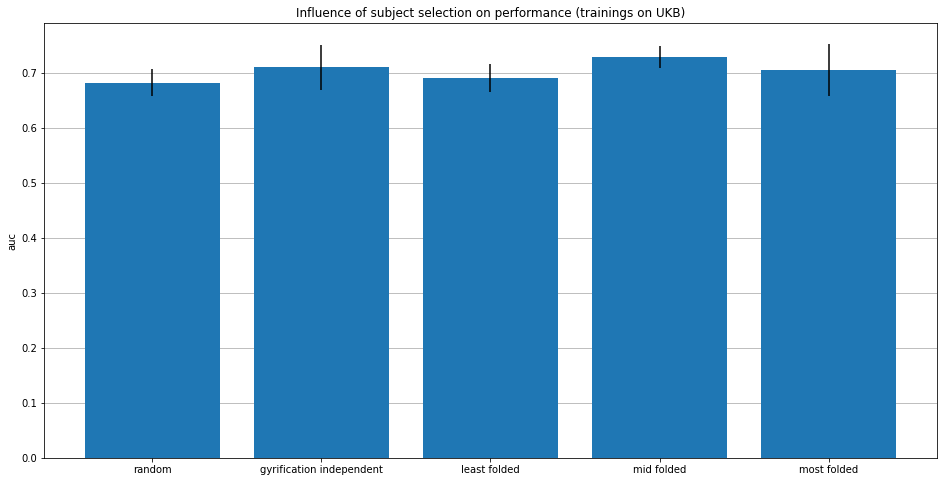

In [ ]:
filtered_bdd = bdd2[bdd2.seed != -1]

Y = filtered_bdd.groupby(['dataset_name','seed']).auc.mean()

counts = filtered_bdd.groupby(['dataset_name','seed']).auc.count()
print(counts)

err_bars = filtered_bdd.groupby(['dataset_name','seed']).auc.apply(confidence_interval)

# to be in the same order than bdd1
Y[0], Y[1] = Y[1], Y[0]
err_bars[0], err_bars[1] = err_bars[1], err_bars[0]

plt.figure(figsize=(16,8))
plt.gca().set_axisbelow(True)
plt.grid(axis='y')

plt.bar(range(len(Y)), Y)
plt.errorbar(range(len(Y)), Y.values, err_bars, fmt='none', c='black')

labels = ['random', 'gyrification independent', 'least folded', 'mid folded', 'most folded']
plt.xticks(ticks=range(len(Y)), labels=labels, rotation=0)
plt.ylabel('auc')
plt.title("Influence of subject selection on performance (trainings on UKB)")
plt.show()

#### Correlation validation loss and auc

Pearson r: 0.35841778349227243 ; p value 0.008406596669949995


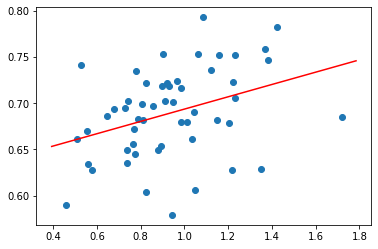

In [ ]:
r,p = pearsonr(bdd2.val_loss, bdd2.auc)
print("Pearson r:", r, "; p value", p)

plt.scatter(bdd2.val_loss, bdd2.auc)

axes = plt.gca()
ymin, ymax = axes.get_ylim()
xmin, xmax = axes.get_xlim()

regline = LinearRegression()
regline.fit(bdd2.val_loss.values.reshape(-1,1), bdd2.auc.values.reshape(-1,1))
y1, y2 = regline.predict([[xmin], [xmax]])

plt.plot([xmin, xmax], [y1, y2], c='red')
plt.show()

# Full bdd

In [ ]:
full_bdd = pd.concat([bdd, bdd2], axis=0)
full_bdd

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,dataset_name,foldlabel,max_angle,max_epochs,nb_subjects,num_representation_features,seed,train_val_csv_file,train_loss,val_loss,random_state,num_outputs,git_branch
3,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.765178,0.002214,0.714760,0.009040,convnet,cingulate_HCP_half_1,True,6.0,5.0,-1,10.0,1,/neurospin/dico/data/deep_folding/papers/midl2...,3.457140,2.962474,NaN,NaN,Run_03_aymeric
4,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.724701,0.003540,0.669287,0.006510,convnet,cingulate_HCP_half_1,True,6.0,5.0,-1,10.0,1,/neurospin/dico/data/deep_folding/papers/midl2...,3.545111,2.529201,NaN,NaN,Run_03_aymeric
68,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.735087,0.004577,0.685918,0.010806,convnet,cingulate_HCP_half_1,True,6.0,5.0,-1,10.0,1,/neurospin/dico/data/deep_folding/papers/ipmi2...,2.306860,2.288595,NaN,NaN,Run_03_aymeric
79,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.734549,0.003508,0.716257,0.005491,convnet,cingulate_HCP_half_1,False,6.0,5.0,-1,10.0,1,/neurospin/dico/data/deep_folding/papers/ipmi2...,1.551873,1.316173,NaN,NaN,Run_03_aymeric
80,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.712555,0.003185,0.686456,0.012417,convnet,cingulate_HCP_half_1,False,6.0,5.0,-1,10.0,1,/neurospin/dico/data/deep_folding/papers/ipmi2...,2.175130,1.757579,NaN,NaN,Run_03_aymeric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.781990,0.002745,0.712585,0.006795,NaN,cingulate_UkBioBank_most_folded_551,NaN,NaN,NaN,-1,NaN,1,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.901927,1.423130,None,NaN,NaN
6,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.645431,0.007441,0.640281,0.010962,NaN,cingulate_UkBioBank_most_folded_551,NaN,NaN,NaN,-1,NaN,1,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.661693,0.772966,None,NaN,NaN
7,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.698808,0.003932,0.626784,0.006968,NaN,cingulate_UkBioBank_most_folded_551,NaN,NaN,NaN,-1,NaN,1,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.608464,0.808280,None,NaN,NaN
8,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.649941,0.004769,0.646152,0.010594,NaN,cingulate_UkBioBank_most_folded_551,NaN,NaN,NaN,-1,NaN,1,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.584766,0.735708,None,NaN,NaN


Pearson r: -0.28381912783468105 ; p value 1.9203613420675995e-05


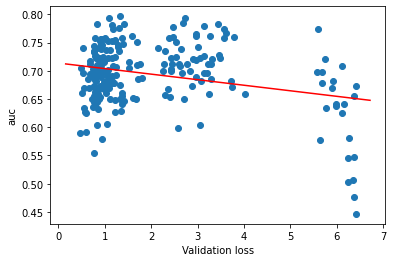

In [ ]:
r,p = pearsonr(full_bdd.val_loss, full_bdd.auc)
print("Pearson r:", r, "; p value", p)

plt.scatter(full_bdd.val_loss, full_bdd.auc)
plt.xlabel("Validation loss")
plt.ylabel("auc")

axes = plt.gca()
ymin, ymax = axes.get_ylim()
xmin, xmax = axes.get_xlim()

regline = LinearRegression()
regline.fit(full_bdd.val_loss.values.reshape(-1,1), full_bdd.auc.values.reshape(-1,1))
y1, y2 = regline.predict([[xmin], [xmax]])

plt.plot([xmin, xmax], [y1, y2], c='red')
plt.show()

<AxesSubplot:xlabel='val_loss', ylabel='auc'>

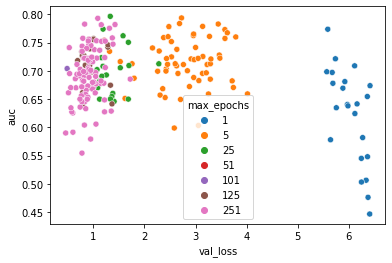

In [ ]:
#plot_bdd = full_bdd.copy()
plot_bdd = plot_bdd.sort_values(by="max_epochs")
plot_bdd.max_epochs = plot_bdd.max_epochs.fillna(251)
plot_bdd.max_epochs = plot_bdd.max_epochs.astype(int).astype(str)

sns.scatterplot(data=plot_bdd, x='val_loss', y='auc', hue='max_epochs')

In [ ]:
filtered_bdd = full_bdd[~full_bdd.dataset_name.str.contains('1114')]
filtered_bdd = filtered_bdd[filtered_bdd.max_epochs >= 125]
filtered_bdd

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,dataset_name,foldlabel,max_angle,max_epochs,nb_subjects,num_representation_features,seed,train_val_csv_file,train_loss,val_loss,random_state,num_outputs,git_branch
0,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.554332,0.020763,0.607836,0.019011,pointnet,cingulate_HCP_half_1,False,10.0,251.0,-1,30.0,1,NaN,1.365892,0.775826,NaN,30.0,pointnet
1,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.781618,0.003536,0.714994,0.007494,convnet,cingulate_HCP_half_1,True,6.0,251.0,-1,10.0,1,/neurospin/dico/data/deep_folding/papers/midl2...,0.577072,1.153862,NaN,NaN,Run_03_aymeric
147,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.710068,0.003659,0.677942,0.011920,convnet,cingulate_UkBioBank_full,True,6.0,125.0,551,10.0,1,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.793347,0.845211,NaN,NaN,Run_03_aymeric
148,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.709880,0.002510,0.698760,0.006784,convnet,cingulate_UkBioBank_full,True,6.0,125.0,551,10.0,1,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.673081,0.840224,NaN,NaN,Run_03_aymeric
149,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.733965,0.003756,0.718082,0.007221,convnet,cingulate_UkBioBank_full,True,6.0,125.0,551,10.0,1,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.641768,0.771076,NaN,NaN,Run_03_aymeric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.720853,0.004433,0.733076,0.006793,convnet,cingulate_UkBioBank_most_folded_551,True,6.0,251.0,-1,10.0,1,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.602328,0.947574,NaN,NaN,Run_03_aymeric
60,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.747058,0.003806,0.701053,0.008453,convnet,cingulate_UkBioBank_most_folded_551,True,6.0,251.0,-1,10.0,1,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.558383,0.911198,NaN,NaN,Run_03_aymeric
101,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.744843,0.004496,0.701661,0.007056,convnet,cingulate_UkBioBank_most_folded_551,True,6.0,251.0,-1,10.0,1,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.690456,0.951879,NaN,NaN,Run_03_aymeric
102,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.716084,0.003883,0.732234,0.009714,convnet,cingulate_UkBioBank_most_folded_551,True,6.0,251.0,-1,10.0,1,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.702846,0.919229,NaN,NaN,Run_03_aymeric


Pearson r: 0.24523900914002575 ; p value 0.058944802146354856


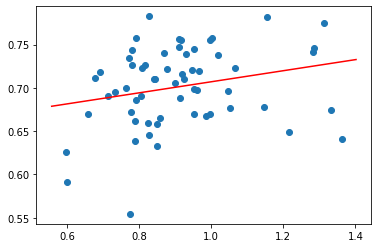

In [ ]:
r,p = pearsonr(filtered_bdd.val_loss, filtered_bdd.auc)
print("Pearson r:", r, "; p value", p)

plt.scatter(filtered_bdd.val_loss, filtered_bdd.auc)

axes = plt.gca()
ymin, ymax = axes.get_ylim()
xmin, xmax = axes.get_xlim()

regline = LinearRegression()
regline.fit(filtered_bdd.val_loss.values.reshape(-1,1), filtered_bdd.auc.values.reshape(-1,1))
y1, y2 = regline.predict([[xmin], [xmax]])

plt.plot([xmin, xmax], [y1, y2], c='red')
plt.show()

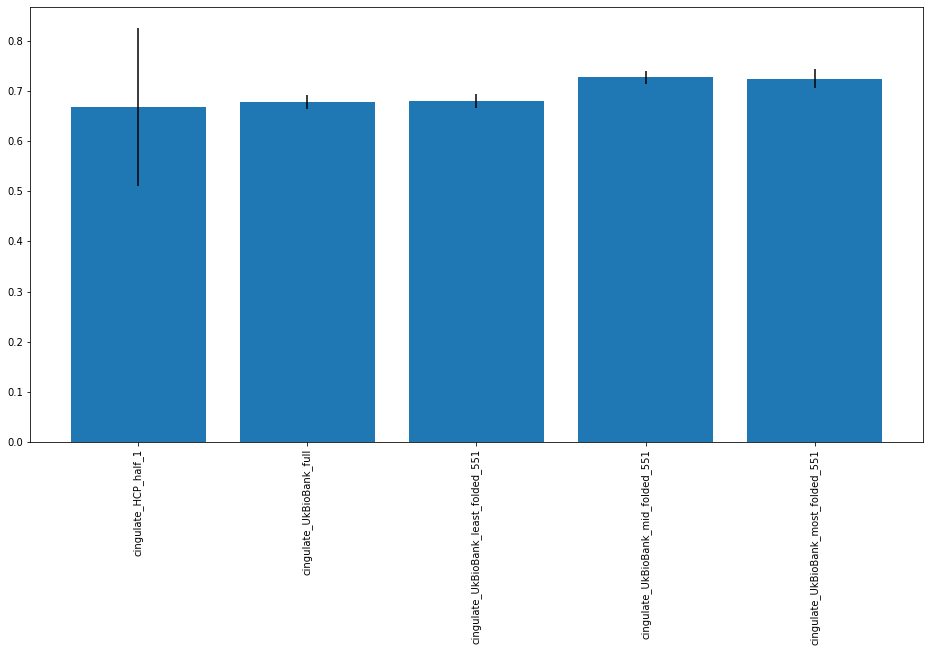

dataset_name
cingulate_HCP_half_1                     2
cingulate_UkBioBank_full                38
cingulate_UkBioBank_least_folded_551    15
cingulate_UkBioBank_mid_folded_551      18
cingulate_UkBioBank_most_folded_551     15
Name: auc, dtype: int64

In [ ]:
X = filtered_bdd.dataset_name.unique()
Y = filtered_bdd.groupby('dataset_name').auc.mean()

N = filtered_bdd.groupby('dataset_name').auc.count()

err_bars = filtered_bdd.groupby('dataset_name').auc.apply(confidence_interval)


plt.figure(figsize=(16,8))
plt.bar(range(X.shape[0]), Y.values)
plt.xticks(ticks=range(X.shape[0]), labels=X, rotation=90)
plt.errorbar(range(X.shape[0]), Y.values, err_bars, fmt='none', c='black')
plt.show()

N

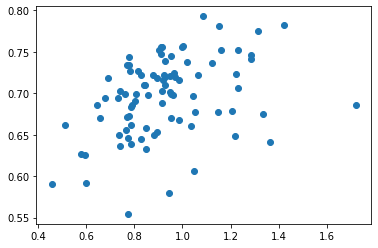

In [ ]:
plt.scatter(filtered_bdd.val_loss, filtered_bdd.auc)
plt.show()

# bdd_best_models

In [ ]:
bdd_bests = pd.read_csv("/neurospin/dico/agaudin/Runs/05_rigourous/Output/gyrification/bdd_best_models.csv", index_col=0)
#bdd_bests = bdd_bests.sort_values(by=['dataset_name'], ascending=True)
bdd_bests

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,nb_subjects,seed,train_val_csv_file,epoch,best_loss,random_state
0,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.663421,0.003296,0.657333,0.010784,cingulate_UkBioBank_full,551,-1.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,187,0.464741,NaN
1,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.699833,0.003114,0.672889,0.009305,cingulate_UkBioBank_full,551,-1.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,81,0.448384,NaN
2,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.568957,0.013460,0.599485,0.011498,cingulate_UkBioBank_full,551,-1.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,101,0.455034,NaN
3,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.694170,0.004490,0.665427,0.007774,cingulate_UkBioBank_full,551,-1.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,101,0.590754,NaN
4,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.710477,0.005223,0.700000,0.008503,cingulate_UkBioBank_full,551,-1.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,74,0.646406,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.721802,0.004460,0.699439,0.008844,cingulate_UkBioBank_full,551,NaN,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,102,0.519774,69.0
17,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.748069,0.004633,0.706199,0.008512,cingulate_UkBioBank_full,551,NaN,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,49,0.712483,111.0
18,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.701860,0.002545,0.677216,0.008701,cingulate_UkBioBank_full,551,NaN,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,162,0.422160,847.0
19,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.715466,0.002934,0.691766,0.007738,cingulate_UkBioBank_full,551,NaN,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,120,0.643686,335.0


### Compare the best models with their fully trained counterparts

In [ ]:
models = bdd_bests.model_path

sub_bdd2 = bdd2[bdd2.model_path.isin(models)]
sub_bdd2

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,nb_subjects,seed,train_val_csv_file,train_loss,val_loss,random_state
32,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.693872,0.002978,0.695930,0.006969,cingulate_UkBioBank_full,551,-1,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.522499,0.677220,None
33,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.702794,0.003852,0.681637,0.010086,cingulate_UkBioBank_full,551,-1,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.635386,0.741110,None
34,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.635786,0.009901,0.624234,0.016793,cingulate_UkBioBank_full,551,-1,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.493687,0.739324,None
35,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.716034,0.005532,0.697029,0.004661,cingulate_UkBioBank_full,551,-1,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.662268,0.984468,None
36,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.722329,0.005523,0.692982,0.013742,cingulate_UkBioBank_full,551,-1,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.759003,0.826757,None
...,...,...,...,...,...,...,...,...,...,...,...,...
38,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.747239,0.002653,0.725380,0.007558,cingulate_UkBioBank_least_folded_551,-1,-1,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.508013,1.383714,None
39,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.690179,0.002560,0.666784,0.008111,cingulate_UkBioBank_least_folded_551,-1,-1,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.814468,1.044868,None
40,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.627339,0.006180,0.617637,0.012240,cingulate_UkBioBank_least_folded_551,-1,-1,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.600064,1.217810,None
41,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.680207,0.005776,0.664655,0.008614,cingulate_UkBioBank_least_folded_551,-1,-1,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.722924,1.010477,None


mean: 0.010619992811214512 std 0.04544042116091065


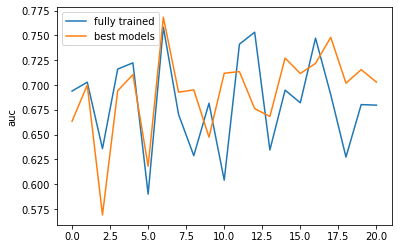

In [ ]:
plt.plot(range(sub_bdd2.shape[0]), sub_bdd2.auc)
plt.plot(range(sub_bdd2.shape[0]), bdd_bests.auc)
plt.legend(["fully trained", "best models"])
plt.ylabel("auc")
plt.plot()


diff = bdd_bests.auc.values - sub_bdd2.auc.values
print("mean:", diff.mean(), "std", diff.std())

[]

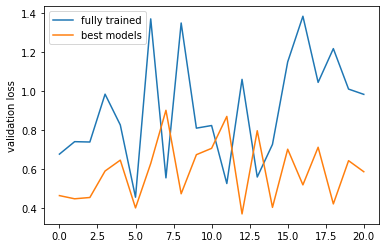

In [ ]:
plt.plot(range(sub_bdd2.shape[0]), sub_bdd2.val_loss)
plt.plot(range(sub_bdd2.shape[0]), bdd_bests.best_loss)
plt.legend(["fully trained", "best models"])
plt.ylabel("validation loss")
plt.plot()

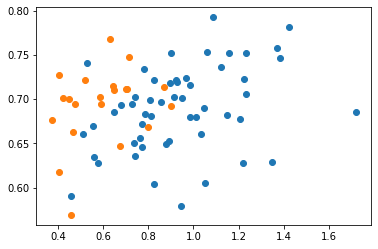

In [ ]:
plt.scatter(bdd2.val_loss, bdd2.auc)
plt.scatter(bdd_bests.best_loss, bdd_bests.auc)
plt.show()